In [1]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils as utils
import torch.nn.init as init
from torchvision import datasets

In [2]:
model_num = 2
data_num = 2
point_len = 10
ch_num = 9
time_len =  point_len/10
point_len = int(point_len/2)+1
fc_len = int(point_len/32)+1

In [3]:
torch.manual_seed(37)
torch.cuda.manual_seed_all(37)
torch.backends.cudnn.deterministic = True

trainX = np.load('../../../npy_data/sim_data%d/%dch_fft/%dch_fft_%.1fms_trainX.npy'\
                 %(data_num, ch_num, ch_num, time_len))
trainY = np.load('../../../npy_data/sim_data%d/%dch_fft/%dch_fft_%.1fms_trainY.npy'\
                 %(data_num, ch_num, ch_num, time_len))
testX = np.load('../../../npy_data/sim_data%d/%dch_fft/%dch_fft_%.1fms_testX.npy'\
                %(data_num, ch_num, ch_num, time_len))
testY = np.load('../../../npy_data/sim_data%d/%dch_fft/%dch_fft_%.1fms_testY.npy'\
                %(data_num, ch_num, ch_num, time_len))

print('%dch_fft data shape  -  %.1f ms'%(ch_num, time_len))
print('train set :', np.shape(trainX) , np.shape(trainY))
print('test set :', np.shape(testX) ,np.shape(testY))

9ch_fft data shape  -  1.0 ms
train set : (76000, 9, 6) (76000, 20)
test set : (19000, 9, 6) (19000, 20)


In [4]:
w0 = np.linspace(200, 1200,ch_num+2)[1:-1]
w0 = 2*np.pi*w0
gm = 200*2*np.pi  ## /s
mass = 1/w0
amp = 1000
print('check :', gm/(2*np.pi), w0/(2*np.pi))

check : 200.0 [ 300.  400.  500.  600.  700.  800.  900. 1000. 1100.]


[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


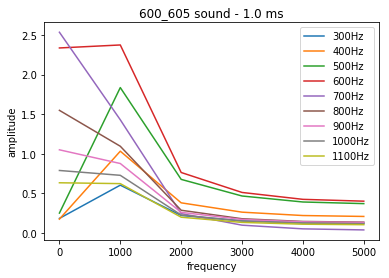

[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


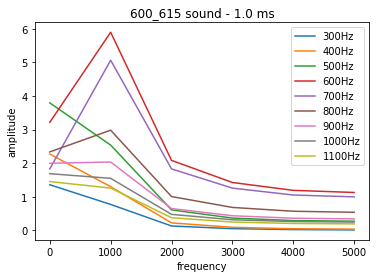

[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


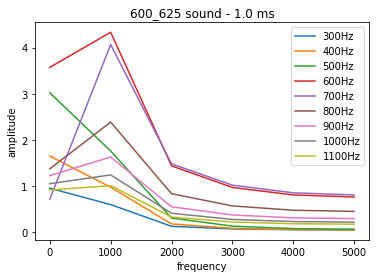

[1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


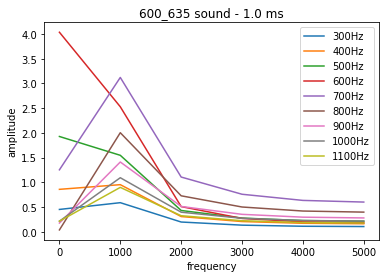

[1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


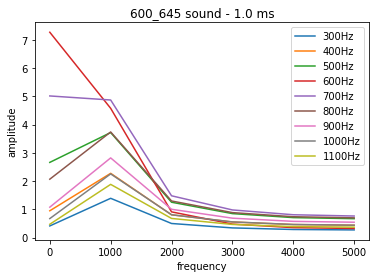

In [5]:
for l in range(5):
    freq1 = 600
    freq2 = 605+10*l
    for k in range(9):
        plt.plot([0,1000,2000,3000,4000,5000],testX[100*l+20][k], label='%dHz'%(int(w0[k]/(2*np.pi)+0.1)))
    print(testY[200*l])
    plt.legend()
    plt.xlabel('frequency')
    plt.ylabel('amplitude')
    plt.title('%d_%d sound - %.1f ms'%(freq1, freq2, time_len))
    plt.savefig('img_fft/%d_%d_%.1fms.png'%(freq1, freq2, time_len))
    plt.show()